In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from sklearn.model_selection import train_test_split

In [3]:
df_treino = pd.read_csv('dataset_treino.csv', keep_default_na=False)
df_teste = pd.read_csv('dataset_teste.csv')

## Modelo #1


🧩 Mapeamento das classes:
0 → 0
1 → 1
2 → 2
3 → 3
4 → 4
Epoch 1/80
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4997 - loss: 1.2497 - val_accuracy: 0.7982 - val_loss: 0.5222 - learning_rate: 0.0010
Epoch 2/80
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7916 - loss: 0.5479 - val_accuracy: 0.8152 - val_loss: 0.4510 - learning_rate: 0.0010
Epoch 3/80
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7970 - loss: 0.5029 - val_accuracy: 0.8061 - val_loss: 0.4374 - learning_rate: 0.0010
Epoch 4/80
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8038 - loss: 0.4769 - val_accuracy: 0.8107 - val_loss: 0.4270 - learning_rate: 0.0010
Epoch 5/80
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8068 - loss: 0.4617 - val_accuracy: 0.8129 - val_loss: 0.4169 - learning_rate: 0.0010
Epoch 6/80
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8112 - loss: 0.4482 - val_accuracy: 0.8243 - val_loss: 0.4141 - learning_rate: 0.0010
Epoch 7/80
248/248 ━━━━━━━━━━━━

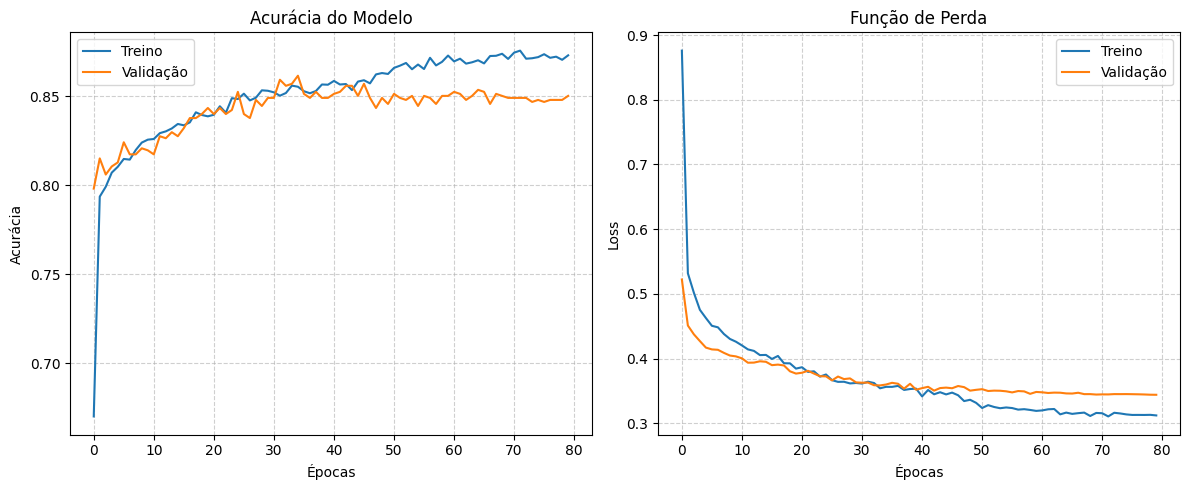

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

📊 Distribuição das previsões no conjunto de teste:
3    1723
2     351
0     143
1      21
4      18
Name: count, dtype: int64

📁 Ficheiro 'submission.csv' criado com sucesso!
   RowId  Result
0      1       3
1      2       3
2      3       3
3      4       3
4      5       3
5      6       3
6      7       3
7      8       3
8      9       3
9     10       3


In [ ]:
import tensorflow as tf import pandas as pd import numpy as np from sklearn.model_selection import train_test_split from sklearn.preprocessing import StandardScaler, LabelEncoder import matplotlib.pyplot as plt # ============================ # 1. Preparar o dataset # ============================ df = df_treino.copy().drop(columns=['Dia'], errors='ignore') # Codificar o target (Injeção na rede) target_col = "Injecao" encoder = LabelEncoder() y = encoder.fit_transform(df[target_col]) # Criar o mapeamento manual (índice → nome da classe) label_map = dict(zip(range(len(encoder.classes_)), encoder.classes_)) print("\n🧩 Mapeamento das classes:") for i, cls in label_map.items(): print(f"{i} → {cls}") # Selecionar apenas colunas numéricas como entrada X = df.drop(columns=[target_col]).copy() # Normalizar os dados scaler = StandardScaler() X_scaled = scaler.fit_transform(X) # Dividir os dados em treino e teste x_train, x_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42, stratify=y ) # Número de classes n_classes = len(np.unique(y)) # ============================ # 2. Definir o modelo # ============================ model = tf.keras.Sequential([ tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)), tf.keras.layers.BatchNormalization(), tf.keras.layers.Dropout(0.3), tf.keras.layers.Dense(64, activation='relu'), tf.keras.layers.BatchNormalization(), tf.keras.layers.Dropout(0.3), tf.keras.layers.Dense(32, activation='relu'), tf.keras.layers.BatchNormalization(), tf.keras.layers.Dense(n_classes, activation='softmax') ]) # Compilar o modelo optimizer = tf.keras.optimizers.Adam(learning_rate=0.0008) model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Callbacks early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True) # ============================ # 3. Treinar o modelo # ============================ history = model.fit( x_train, y_train, epochs=60, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stop] ) # ============================ # 4. Avaliar o modelo # ============================ loss, acc = model.evaluate(x_test, y_test) print(f"\n✅ Acurácia no teste: {acc:.4f}") # Mostrar previsões de exemplo preds = model.predict(x_test[:10]) pred_classes = np.argmax(preds, axis=1) print("\n🔍 Exemplos de previsões:") for i, pred in enumerate(pred_classes): real = y_test[i] print(f"Previsto: {label_map[int(pred)]} | Real: {label_map[int(real)]}") # ============================ # 5. Gráficos de treino # ============================ plt.figure(figsize=(12, 5)) plt.subplot(1, 2, 1) plt.plot(history.history['accuracy'], label='Treino') plt.plot(history.history['val_accuracy'], label='Validação') plt.title('Acurácia do Modelo') plt.xlabel('Épocas') plt.ylabel('Acurácia') plt.legend() plt.grid(True, linestyle='--', alpha=0.6) plt.subplot(1, 2, 2) plt.plot(history.history['loss'], label='Treino') plt.plot(history.history['val_loss'], label='Validação') plt.title('Função de Perda') plt.xlabel('Épocas') plt.ylabel('Loss') plt.legend() plt.grid(True, linestyle='--', alpha=0.6) plt.tight_layout() plt.show() # ============================ # 6. Previsões no dataset de teste # ============================ # Preparar o dataset de teste exatamente como o de treino df_teste_proc = df_teste.copy().drop(columns=['Dia'], errors='ignore') # Normalizar com o mesmo scaler X_test_final = scaler.transform(df_teste_proc) # Fazer previsões predictions = model.predict(X_test_final) pred_classes = np.argmax(predictions, axis=1) # 🔁 Converter previsões numéricas para texto com o LabelEncoder original pred_labels = encoder.inverse_transform(pred_classes) # Mostrar a distribuição das classes previstas (verificação) print("\n📊 Distribuição das previsões no conjunto de teste:") print(pd.Series(pred_labels).value_counts()) # ============================ # 7. Exportar CSV (com nomes) # ============================ submission = pd.DataFrame({ "RowId": np.arange(1, len(pred_labels) + 1), "Result": pred_labels }) submission.to_csv("submission.csv", index=False, encoding='utf-8') print("\n📁 Ficheiro 'submission.csv' criado com sucesso!") print(submission.head(10))

Encoder classes: ['0', '1', '2', '3', '4']
Num cols: 15 | Cat cols: 0
NN shapes: (8812, 15) (2204, 15) (2256, 15)

Training CatBoost (OOF)...
-- fold 1
0:	learn: 1.4795762	test: 1.4802900	best: 1.4802900 (0)	total: 43.7ms	remaining: 1m 27s
200:	learn: 0.2232189	test: 0.2936138	best: 0.2935813 (199)	total: 14.4s	remaining: 2m 8s
400:	learn: 0.1623579	test: 0.2771588	best: 0.2771588 (400)	total: 27.8s	remaining: 1m 50s
600:	learn: 0.1256775	test: 0.2742726	best: 0.2742217 (588)	total: 44.1s	remaining: 1m 42s
800:	learn: 0.1005631	test: 0.2748120	best: 0.2739863 (677)	total: 1m	remaining: 1m 30s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.2739863268
bestIteration = 677

Shrink model to first 678 iterations.
-- fold 2
0:	learn: 1.4857524	test: 1.4863775	best: 1.4863775 (0)	total: 63.4ms	remaining: 2m 6s
200:	learn: 0.2249595	test: 0.2895218	best: 0.2895218 (200)	total: 13.9s	remaining: 2m 4s
400:	learn: 0.1633015	test: 0.2755563	best: 0.2753597 (395)	total: 27.5s	r

138/138 - 3s - 22ms/step - accuracy: 0.5616 - loss: 1.5818 - val_accuracy: 0.7840 - val_loss: 0.8557 - learning_rate: 6.0000e-04
Epoch 2/120


138/138 - 1s - 4ms/step - accuracy: 0.7498 - loss: 1.1491 - val_accuracy: 0.8040 - val_loss: 0.6186 - learning_rate: 6.0000e-04
Epoch 3/120


138/138 - 1s - 4ms/step - accuracy: 0.7829 - loss: 1.0290 - val_accuracy: 0.7999 - val_loss: 0.5581 - learning_rate: 6.0000e-04
Epoch 4/120


138/138 - 1s - 4ms/step - accuracy: 0.7954 - loss: 0.9609 - val_accuracy: 0.8058 - val_loss: 0.5208 - learning_rate: 6.0000e-04
Epoch 5/120


138/138 - 1s - 6ms/step - accuracy: 0.8038 - loss: 0.9228 - val_accuracy: 0.8113 - val_loss: 0.4965 - learning_rate: 6.0000e-04
Epoch 6/120


138/138 - 1s - 8ms/step - accuracy: 0.8078 - loss: 0.8839 - val_accuracy: 0.8172 - val_loss: 0.4726 - learning_rate: 6.0000e-04
Epoch 7/120


138/138 - 1s - 5ms/step - accuracy: 0.8123 - loss: 0.8637 - val_accuracy: 0.8194 - val_loss: 0.4605 - learning_rate: 6.0000e-04
Epoch 8/120


138/138 - 1s - 6ms/step - accuracy: 0.8128 - loss: 0.8369 - val_accuracy: 0.8190 - val_loss: 0.4500 - learning_rate: 6.0000e-04
Epoch 9/120


138/138 - 1s - 6ms/step - accuracy: 0.8191 - loss: 0.8223 - val_accuracy: 0.8217 - val_loss: 0.4419 - learning_rate: 6.0000e-04
Epoch 10/120


138/138 - 1s - 5ms/step - accuracy: 0.8183 - loss: 0.8086 - val_accuracy: 0.8267 - val_loss: 0.4331 - learning_rate: 6.0000e-04
Epoch 11/120


138/138 - 1s - 5ms/step - accuracy: 0.8198 - loss: 0.8040 - val_accuracy: 0.8262 - val_loss: 0.4272 - learning_rate: 6.0000e-04
Epoch 12/120


138/138 - 1s - 4ms/step - accuracy: 0.8263 - loss: 0.7804 - val_accuracy: 0.8240 - val_loss: 0.4222 - learning_rate: 6.0000e-04
Epoch 13/120


138/138 - 1s - 5ms/step - accuracy: 0.8344 - loss: 0.7480 - val_accuracy: 0.8258 - val_loss: 0.4153 - learning_rate: 6.0000e-04
Epoch 14/120
138/138 - 1s - 5ms/step - accuracy: 0.8302 - loss: 0.7461 - val_accuracy: 0.8235 - val_loss: 0.4175 - learning_rate: 6.0000e-04
Epoch 15/120


138/138 - 1s - 6ms/step - accuracy: 0.8336 - loss: 0.7378 - val_accuracy: 0.8244 - val_loss: 0.4110 - learning_rate: 6.0000e-04
Epoch 16/120


138/138 - 1s - 6ms/step - accuracy: 0.8391 - loss: 0.7188 - val_accuracy: 0.8280 - val_loss: 0.4007 - learning_rate: 6.0000e-04
Epoch 17/120


138/138 - 1s - 7ms/step - accuracy: 0.8359 - loss: 0.7258 - val_accuracy: 0.8312 - val_loss: 0.3994 - learning_rate: 6.0000e-04
Epoch 18/120
138/138 - 1s - 6ms/step - accuracy: 0.8391 - loss: 0.7075 - val_accuracy: 0.8258 - val_loss: 0.4006 - learning_rate: 6.0000e-04
Epoch 19/120


138/138 - 1s - 9ms/step - accuracy: 0.8416 - loss: 0.7079 - val_accuracy: 0.8344 - val_loss: 0.3918 - learning_rate: 6.0000e-04
Epoch 20/120


138/138 - 1s - 6ms/step - accuracy: 0.8404 - loss: 0.6915 - val_accuracy: 0.8380 - val_loss: 0.3884 - learning_rate: 6.0000e-04
Epoch 21/120


138/138 - 1s - 9ms/step - accuracy: 0.8432 - loss: 0.6884 - val_accuracy: 0.8344 - val_loss: 0.3860 - learning_rate: 6.0000e-04
Epoch 22/120


138/138 - 1s - 9ms/step - accuracy: 0.8453 - loss: 0.6833 - val_accuracy: 0.8380 - val_loss: 0.3777 - learning_rate: 6.0000e-04
Epoch 23/120
138/138 - 1s - 6ms/step - accuracy: 0.8449 - loss: 0.6681 - val_accuracy: 0.8367 - val_loss: 0.3844 - learning_rate: 6.0000e-04
Epoch 24/120


138/138 - 1s - 7ms/step - accuracy: 0.8476 - loss: 0.6543 - val_accuracy: 0.8385 - val_loss: 0.3764 - learning_rate: 6.0000e-04
Epoch 25/120
138/138 - 1s - 6ms/step - accuracy: 0.8509 - loss: 0.6526 - val_accuracy: 0.8407 - val_loss: 0.3802 - learning_rate: 6.0000e-04
Epoch 26/120


138/138 - 1s - 5ms/step - accuracy: 0.8470 - loss: 0.6579 - val_accuracy: 0.8412 - val_loss: 0.3750 - learning_rate: 6.0000e-04
Epoch 27/120


138/138 - 1s - 4ms/step - accuracy: 0.8522 - loss: 0.6363 - val_accuracy: 0.8457 - val_loss: 0.3727 - learning_rate: 6.0000e-04
Epoch 28/120


138/138 - 1s - 5ms/step - accuracy: 0.8500 - loss: 0.6456 - val_accuracy: 0.8403 - val_loss: 0.3680 - learning_rate: 6.0000e-04
Epoch 29/120
138/138 - 1s - 5ms/step - accuracy: 0.8551 - loss: 0.6398 - val_accuracy: 0.8417 - val_loss: 0.3710 - learning_rate: 6.0000e-04
Epoch 30/120


138/138 - 1s - 4ms/step - accuracy: 0.8526 - loss: 0.6250 - val_accuracy: 0.8485 - val_loss: 0.3619 - learning_rate: 6.0000e-04
Epoch 31/120


138/138 - 1s - 6ms/step - accuracy: 0.8579 - loss: 0.6260 - val_accuracy: 0.8498 - val_loss: 0.3610 - learning_rate: 6.0000e-04
Epoch 32/120


138/138 - 1s - 7ms/step - accuracy: 0.8541 - loss: 0.6221 - val_accuracy: 0.8457 - val_loss: 0.3605 - learning_rate: 6.0000e-04
Epoch 33/120
138/138 - 1s - 6ms/step - accuracy: 0.8560 - loss: 0.6164 - val_accuracy: 0.8507 - val_loss: 0.3606 - learning_rate: 6.0000e-04
Epoch 34/120
138/138 - 1s - 5ms/step - accuracy: 0.8561 - loss: 0.6119 - val_accuracy: 0.8426 - val_loss: 0.3627 - learning_rate: 6.0000e-04
Epoch 35/120


138/138 - 1s - 4ms/step - accuracy: 0.8589 - loss: 0.6078 - val_accuracy: 0.8503 - val_loss: 0.3572 - learning_rate: 6.0000e-04
Epoch 36/120
138/138 - 1s - 4ms/step - accuracy: 0.8609 - loss: 0.6124 - val_accuracy: 0.8471 - val_loss: 0.3633 - learning_rate: 6.0000e-04
Epoch 37/120


138/138 - 1s - 6ms/step - accuracy: 0.8616 - loss: 0.6040 - val_accuracy: 0.8498 - val_loss: 0.3551 - learning_rate: 6.0000e-04
Epoch 38/120
138/138 - 1s - 5ms/step - accuracy: 0.8593 - loss: 0.5976 - val_accuracy: 0.8462 - val_loss: 0.3556 - learning_rate: 6.0000e-04
Epoch 39/120


138/138 - 1s - 4ms/step - accuracy: 0.8592 - loss: 0.6173 - val_accuracy: 0.8566 - val_loss: 0.3497 - learning_rate: 6.0000e-04
Epoch 40/120


138/138 - 1s - 4ms/step - accuracy: 0.8618 - loss: 0.5967 - val_accuracy: 0.8571 - val_loss: 0.3492 - learning_rate: 6.0000e-04
Epoch 41/120
138/138 - 0s - 3ms/step - accuracy: 0.8595 - loss: 0.6023 - val_accuracy: 0.8516 - val_loss: 0.3526 - learning_rate: 6.0000e-04
Epoch 42/120
138/138 - 0s - 3ms/step - accuracy: 0.8648 - loss: 0.5915 - val_accuracy: 0.8503 - val_loss: 0.3557 - learning_rate: 6.0000e-04
Epoch 43/120
138/138 - 1s - 5ms/step - accuracy: 0.8604 - loss: 0.5958 - val_accuracy: 0.8557 - val_loss: 0.3498 - learning_rate: 6.0000e-04
Epoch 44/120
138/138 - 1s - 4ms/step - accuracy: 0.8653 - loss: 0.5826 - val_accuracy: 0.8485 - val_loss: 0.3564 - learning_rate: 6.0000e-04
Epoch 45/120

Epoch 45: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
138/138 - 1s - 6ms/step - accuracy: 0.8670 - loss: 0.5816 - val_accuracy: 0.8480 - val_loss: 0.3528 - learning_rate: 6.0000e-04
Epoch 46/120
138/138 - 1s - 9ms/step - accuracy: 0.8686 - loss: 0.5740 - val_accuracy: 0.

138/138 - 1s - 8ms/step - accuracy: 0.8696 - loss: 0.5663 - val_accuracy: 0.8548 - val_loss: 0.3449 - learning_rate: 3.0000e-04
Epoch 48/120
138/138 - 1s - 4ms/step - accuracy: 0.8703 - loss: 0.5600 - val_accuracy: 0.8498 - val_loss: 0.3522 - learning_rate: 3.0000e-04
Epoch 49/120
138/138 - 1s - 5ms/step - accuracy: 0.8677 - loss: 0.5737 - val_accuracy: 0.8530 - val_loss: 0.3487 - learning_rate: 3.0000e-04
Epoch 50/120
138/138 - 1s - 4ms/step - accuracy: 0.8705 - loss: 0.5559 - val_accuracy: 0.8516 - val_loss: 0.3489 - learning_rate: 3.0000e-04
Epoch 51/120


138/138 - 1s - 7ms/step - accuracy: 0.8719 - loss: 0.5587 - val_accuracy: 0.8607 - val_loss: 0.3427 - learning_rate: 3.0000e-04
Epoch 52/120
138/138 - 1s - 5ms/step - accuracy: 0.8700 - loss: 0.5537 - val_accuracy: 0.8544 - val_loss: 0.3475 - learning_rate: 3.0000e-04
Epoch 53/120
138/138 - 1s - 5ms/step - accuracy: 0.8722 - loss: 0.5546 - val_accuracy: 0.8589 - val_loss: 0.3428 - learning_rate: 3.0000e-04
Epoch 54/120
138/138 - 1s - 8ms/step - accuracy: 0.8689 - loss: 0.5634 - val_accuracy: 0.8553 - val_loss: 0.3468 - learning_rate: 3.0000e-04
Epoch 55/120
138/138 - 1s - 4ms/step - accuracy: 0.8714 - loss: 0.5520 - val_accuracy: 0.8553 - val_loss: 0.3450 - learning_rate: 3.0000e-04
Epoch 56/120


138/138 - 1s - 6ms/step - accuracy: 0.8731 - loss: 0.5457 - val_accuracy: 0.8621 - val_loss: 0.3410 - learning_rate: 3.0000e-04
Epoch 57/120
138/138 - 1s - 4ms/step - accuracy: 0.8735 - loss: 0.5529 - val_accuracy: 0.8575 - val_loss: 0.3449 - learning_rate: 3.0000e-04
Epoch 58/120
138/138 - 1s - 4ms/step - accuracy: 0.8737 - loss: 0.5504 - val_accuracy: 0.8566 - val_loss: 0.3411 - learning_rate: 3.0000e-04
Epoch 59/120
138/138 - 1s - 5ms/step - accuracy: 0.8718 - loss: 0.5503 - val_accuracy: 0.8607 - val_loss: 0.3416 - learning_rate: 3.0000e-04
Epoch 60/120


138/138 - 1s - 6ms/step - accuracy: 0.8772 - loss: 0.5438 - val_accuracy: 0.8612 - val_loss: 0.3405 - learning_rate: 3.0000e-04
Epoch 61/120
138/138 - 1s - 5ms/step - accuracy: 0.8747 - loss: 0.5404 - val_accuracy: 0.8571 - val_loss: 0.3428 - learning_rate: 3.0000e-04
Epoch 62/120
138/138 - 1s - 6ms/step - accuracy: 0.8781 - loss: 0.5365 - val_accuracy: 0.8571 - val_loss: 0.3405 - learning_rate: 3.0000e-04
Epoch 63/120


138/138 - 1s - 4ms/step - accuracy: 0.8760 - loss: 0.5379 - val_accuracy: 0.8616 - val_loss: 0.3394 - learning_rate: 3.0000e-04
Epoch 64/120
138/138 - 1s - 5ms/step - accuracy: 0.8717 - loss: 0.5495 - val_accuracy: 0.8562 - val_loss: 0.3448 - learning_rate: 3.0000e-04
Epoch 65/120
138/138 - 1s - 4ms/step - accuracy: 0.8739 - loss: 0.5444 - val_accuracy: 0.8598 - val_loss: 0.3429 - learning_rate: 3.0000e-04
Epoch 66/120


138/138 - 1s - 4ms/step - accuracy: 0.8730 - loss: 0.5472 - val_accuracy: 0.8643 - val_loss: 0.3379 - learning_rate: 3.0000e-04
Epoch 67/120
138/138 - 1s - 4ms/step - accuracy: 0.8737 - loss: 0.5378 - val_accuracy: 0.8621 - val_loss: 0.3393 - learning_rate: 3.0000e-04
Epoch 68/120
138/138 - 1s - 4ms/step - accuracy: 0.8760 - loss: 0.5409 - val_accuracy: 0.8607 - val_loss: 0.3393 - learning_rate: 3.0000e-04
Epoch 69/120


138/138 - 1s - 5ms/step - accuracy: 0.8778 - loss: 0.5245 - val_accuracy: 0.8625 - val_loss: 0.3367 - learning_rate: 3.0000e-04
Epoch 70/120
138/138 - 1s - 4ms/step - accuracy: 0.8726 - loss: 0.5440 - val_accuracy: 0.8612 - val_loss: 0.3386 - learning_rate: 3.0000e-04
Epoch 71/120
138/138 - 1s - 4ms/step - accuracy: 0.8746 - loss: 0.5371 - val_accuracy: 0.8648 - val_loss: 0.3414 - learning_rate: 3.0000e-04
Epoch 72/120
138/138 - 1s - 4ms/step - accuracy: 0.8783 - loss: 0.5338 - val_accuracy: 0.8630 - val_loss: 0.3401 - learning_rate: 3.0000e-04
Epoch 73/120
138/138 - 1s - 6ms/step - accuracy: 0.8757 - loss: 0.5315 - val_accuracy: 0.8625 - val_loss: 0.3392 - learning_rate: 3.0000e-04
Epoch 74/120

Epoch 74: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
138/138 - 1s - 5ms/step - accuracy: 0.8810 - loss: 0.5212 - val_accuracy: 0.8621 - val_loss: 0.3392 - learning_rate: 3.0000e-04
Epoch 75/120
138/138 - 1s - 4ms/step - accuracy: 0.8740 - loss: 0.5324 - val_accuracy: 0.

138/138 - 1s - 5ms/step - accuracy: 0.8762 - loss: 0.5196 - val_accuracy: 0.8634 - val_loss: 0.3366 - learning_rate: 1.5000e-04
Epoch 80/120


138/138 - 1s - 5ms/step - accuracy: 0.8835 - loss: 0.5095 - val_accuracy: 0.8643 - val_loss: 0.3364 - learning_rate: 7.5000e-05
Epoch 81/120
138/138 - 1s - 4ms/step - accuracy: 0.8848 - loss: 0.5112 - val_accuracy: 0.8648 - val_loss: 0.3365 - learning_rate: 7.5000e-05
Epoch 82/120


138/138 - 1s - 4ms/step - accuracy: 0.8822 - loss: 0.5158 - val_accuracy: 0.8652 - val_loss: 0.3351 - learning_rate: 7.5000e-05
Epoch 83/120
138/138 - 1s - 4ms/step - accuracy: 0.8811 - loss: 0.5107 - val_accuracy: 0.8634 - val_loss: 0.3366 - learning_rate: 7.5000e-05
Epoch 84/120
138/138 - 1s - 4ms/step - accuracy: 0.8793 - loss: 0.5181 - val_accuracy: 0.8666 - val_loss: 0.3358 - learning_rate: 7.5000e-05
Epoch 85/120
138/138 - 1s - 4ms/step - accuracy: 0.8854 - loss: 0.5077 - val_accuracy: 0.8630 - val_loss: 0.3356 - learning_rate: 7.5000e-05
Epoch 86/120
138/138 - 1s - 4ms/step - accuracy: 0.8822 - loss: 0.5137 - val_accuracy: 0.8666 - val_loss: 0.3355 - learning_rate: 7.5000e-05
Epoch 87/120

Epoch 87: ReduceLROnPlateau reducing learning rate to 3.7500001781154424e-05.
138/138 - 0s - 4ms/step - accuracy: 0.8810 - loss: 0.5112 - val_accuracy: 0.8648 - val_loss: 0.3367 - learning_rate: 7.5000e-05
Epoch 88/120
138/138 - 1s - 4ms/step - accuracy: 0.8827 - loss: 0.5161 - val_accuracy: 0

138/138 - 1s - 5ms/step - accuracy: 0.8794 - loss: 0.5192 - val_accuracy: 0.8648 - val_loss: 0.3347 - learning_rate: 3.7500e-05
Epoch 90/120
138/138 - 1s - 6ms/step - accuracy: 0.8852 - loss: 0.5068 - val_accuracy: 0.8648 - val_loss: 0.3348 - learning_rate: 3.7500e-05
Epoch 91/120
138/138 - 1s - 4ms/step - accuracy: 0.8823 - loss: 0.5092 - val_accuracy: 0.8648 - val_loss: 0.3355 - learning_rate: 3.7500e-05
Epoch 92/120
138/138 - 1s - 4ms/step - accuracy: 0.8842 - loss: 0.5157 - val_accuracy: 0.8630 - val_loss: 0.3364 - learning_rate: 3.7500e-05
Epoch 93/120
138/138 - 1s - 4ms/step - accuracy: 0.8790 - loss: 0.5183 - val_accuracy: 0.8639 - val_loss: 0.3362 - learning_rate: 3.7500e-05
Epoch 94/120

Epoch 94: ReduceLROnPlateau reducing learning rate to 1.8750000890577212e-05.
138/138 - 1s - 5ms/step - accuracy: 0.8808 - loss: 0.5183 - val_accuracy: 0.8639 - val_loss: 0.3372 - learning_rate: 3.7500e-05
Epoch 95/120
138/138 - 1s - 5ms/step - accuracy: 0.8779 - loss: 0.5132 - val_accuracy: 0

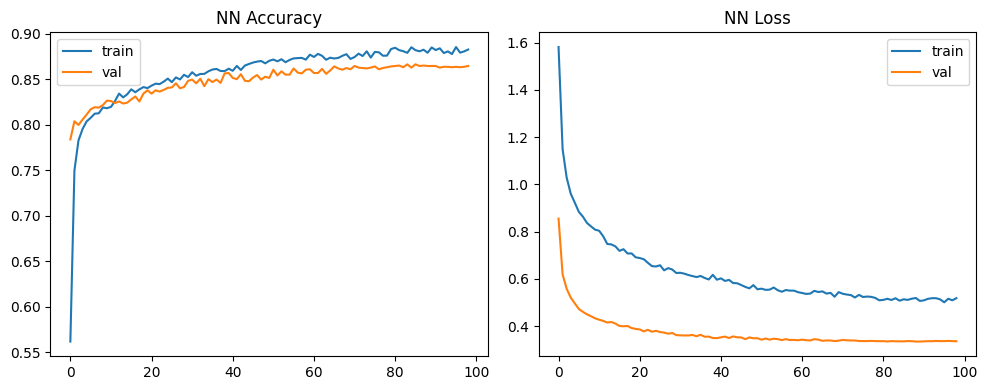


✅ Pipeline improved finished. Files: submission_improved.csv and models_improved/*


In [13]:
# =====================================================
# IMPROVED: CLASSIFICAÇÃO DE INJEÇÃO — (Baseado no teu script)
# CatBoost + LightGBM + NN + Stacking meta (LogisticRegression)
# =====================================================

import os, random, warnings
warnings.filterwarnings("ignore")
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)

import numpy as np
np.random.seed(SEED)
import pandas as pd

# imports
try:
    from catboost import CatBoostClassifier, Pool
except Exception:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "catboost"])
    from catboost import CatBoostClassifier, Pool

try:
    import lightgbm as lgb
except Exception:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "lightgbm"])
    import lightgbm as lgb

import tensorflow as tf
tf.random.set_seed(SEED)

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
import joblib

import matplotlib.pyplot as plt

# -------------------------
# 0. Prepare data (use user's df_treino and df_teste in the session)
# -------------------------
df = df_treino.copy()
df_test_final = df_teste.copy()

# drop 'Dia' if present (as in your pipeline)
df = df.drop(columns=['Dia'], errors='ignore')
df_test_final = df_test_final.drop(columns=['Dia'], errors='ignore')

target_col = "Injecao"
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found in df_treino.")

# label encode target (keep encoder for inverse_transform)
encoder = LabelEncoder()
y_all = encoder.fit_transform(df[target_col].astype(str))
print("Encoder classes:", list(encoder.classes_))

# features
X_all = df.drop(columns=[target_col]).copy()
X_test = df_test_final.copy()

# ensure test has same columns as train (add missing with NaN, drop extras)
for c in X_all.columns:
    if c not in X_test.columns:
        X_test[c] = np.nan
extra_cols = [c for c in X_test.columns if c not in X_all.columns]
if extra_cols:
    X_test = X_test.drop(columns=extra_cols)
# reorder
X_test = X_test[X_all.columns]

# numeric / categorical detection
num_cols = X_all.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X_all.columns if c not in num_cols]

print(f"Num cols: {len(num_cols)} | Cat cols: {len(cat_cols)}")

# impute numerics with median, cats with 'missing'
X_all[num_cols] = X_all[num_cols].fillna(X_all[num_cols].median())
X_test[num_cols] = X_test[num_cols].fillna(X_all[num_cols].median())

X_all[cat_cols] = X_all[cat_cols].fillna("missing").astype(str)
X_test[cat_cols] = X_test[cat_cols].fillna("missing").astype(str)

# -------------------------
# 1. Train/val split for NN and quick validation (stratified)
# -------------------------
x_tr, x_val, y_tr, y_val = train_test_split(
    X_all, y_all, test_size=0.2, random_state=SEED, stratify=y_all
)

# scaler for numerical features (used by NN and LightGBM)
scaler = StandardScaler()
scaler.fit(x_tr[num_cols])

# helper: prepare arrays for NN (numerical scaled + simple frequency encoding for cats)
def prepare_for_nn(df_df):
    X_num = scaler.transform(df_df[num_cols])
    cat_enc_arrays = []
    for c in cat_cols:
        nunique = X_all[c].nunique()
        if nunique <= 10:
            dummies = pd.get_dummies(df_df[c], prefix=c)
            dummies = dummies.reindex(columns=[f"{c}_{v}" for v in sorted(X_all[c].unique())], fill_value=0)
            cat_enc_arrays.append(dummies.values)
        else:
            freq = X_all[c].value_counts(normalize=True)
            cat_enc_arrays.append(df_df[c].map(freq).fillna(0).values.reshape(-1,1))
    if cat_enc_arrays:
        X_cat = np.hstack(cat_enc_arrays)
        X_final = np.hstack([X_num, X_cat])
    else:
        X_final = X_num
    return X_final.astype(np.float32)

X_train_nn = prepare_for_nn(x_tr)
X_val_nn = prepare_for_nn(x_val)
X_test_nn = prepare_for_nn(X_test)

print("NN shapes:", X_train_nn.shape, X_val_nn.shape, X_test_nn.shape)

# -------------------------
# 2. CatBoost OOF (StratifiedKFold) with more robust params
# -------------------------
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=SEED)

oof_cb = np.zeros((len(X_all), len(encoder.classes_)))
test_pred_cb = np.zeros((len(X_test), len(encoder.classes_)))

# tuned (conservative) CatBoost params
cb_params = {
    "iterations": 2000,
    "learning_rate": 0.05,
    "eval_metric": "MultiClass",
    "loss_function": "MultiClass",
    "random_seed": SEED,
    "task_type": "CPU",   # coloque GPU se tiver disponível
    "verbose": 200,
    "early_stopping_rounds": 200,

    # 🔥 Correção do erro
    "bootstrap_type": "Bernoulli",
    "subsample": 0.8,   # agora permitido

    # 🔥 Melhora real de performance
    "l2_leaf_reg": 3,
    "depth": 8,
    "rsm": 0.9
}


print("\nTraining CatBoost (OOF)...")
for fold, (tr_idx, val_idx) in enumerate(skf.split(X_all, y_all), 1):
    print(f"-- fold {fold}")
    X_tr_fold = X_all.iloc[tr_idx]
    y_tr_fold = y_all[tr_idx]
    X_val_fold = X_all.iloc[val_idx]
    y_val_fold = y_all[val_idx]

    pool_tr = Pool(X_tr_fold, y_tr_fold, cat_features=cat_cols)
    pool_val = Pool(X_val_fold, y_val_fold, cat_features=cat_cols)
    mcb = CatBoostClassifier(**cb_params)
    mcb.fit(pool_tr, eval_set=pool_val, use_best_model=True)
    oof_cb[val_idx] = mcb.predict_proba(X_val_fold)
    test_pred_cb += mcb.predict_proba(X_test) / n_splits

# metrics CatBoost OOF
oof_cb_classes = np.argmax(oof_cb, axis=1)
print("\nCatBoost OOF acc:", accuracy_score(y_all, oof_cb_classes))
print(classification_report(y_all, oof_cb_classes, target_names=[str(c) for c in encoder.classes_]))

# -------------------------
# 3. LightGBM OOF (on scaled features)
# -------------------------
oof_lgb = np.zeros_like(oof_cb)
test_pred_lgb = np.zeros_like(test_pred_cb)

lgb_params = {
    'objective': 'multiclass',
    'num_class': len(encoder.classes_),
    'learning_rate': 0.03,
    'num_leaves': 64,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'seed': SEED,
    'verbosity': -1
}

print("\nTraining LightGBM (OOF)...")
for fold, (tr_idx, val_idx) in enumerate(skf.split(X_all, y_all), 1):
    print(f"-- fold {fold}")
    Xtr = scaler.transform(X_all.iloc[tr_idx])
    Xv = scaler.transform(X_all.iloc[val_idx])
    ytr = y_all[tr_idx]
    yv = y_all[val_idx]

    dtrain = lgb.Dataset(Xtr, label=ytr)
    dval = lgb.Dataset(Xv, label=yv)
    clf = lgb.train(
    lgb_params,
    dtrain,
    valid_sets=[dval],
    num_boost_round=3000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=150),
        lgb.log_evaluation(period=200)
    ]
)

    oof_lgb[val_idx] = clf.predict(Xv)
    test_pred_lgb += clf.predict(scaler.transform(X_test)) / n_splits

oof_lgb_classes = np.argmax(oof_lgb, axis=1)
print("\nLightGBM OOF acc:", accuracy_score(y_all, oof_lgb_classes))
print(classification_report(y_all, oof_lgb_classes, target_names=[str(c) for c in encoder.classes_]))

# -------------------------
# 4. Neural Network (kept but class_weights clipped to avoid extreme forcing)
# -------------------------
# compute class weights from training split x_tr / y_tr
classes = np.unique(y_tr)
cw = compute_class_weight('balanced', classes=classes, y=y_tr)
class_weight_dict = {int(c): float(w) for c,w in zip(classes, cw)}

# clip weights to [0.6, 3.0] to avoid overcompensation
for k in class_weight_dict:
    class_weight_dict[k] = max(0.6, min(class_weight_dict[k], 3.0))

print("\nNN class weights (clipped):", class_weight_dict)

# build NN (slightly slimmer)
from tensorflow.keras import layers, models, regularizers, callbacks, optimizers
tf.keras.backend.clear_session()

def build_nn(input_dim, n_classes):
    inp = layers.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(inp)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x)

    out = layers.Dense(n_classes, activation='softmax')(x)
    model = models.Model(inputs=inp, outputs=out)
    return model

input_dim = X_train_nn.shape[1]
n_classes = len(encoder.classes_)
model_nn = build_nn(input_dim, n_classes)
opt = optimizers.Adam(learning_rate=6e-4)  # slightly lower lr
model_nn.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
rlr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
ckp = callbacks.ModelCheckpoint("best_model_nn_improved.h5", monitor='val_loss', save_best_only=True, verbose=0)

history = model_nn.fit(
    X_train_nn, y_tr,
    validation_data=(X_val_nn, y_val),
    epochs=120,
    batch_size=64,
    class_weight=class_weight_dict,
    callbacks=[es, rlr, ckp],
    verbose=2
)

val_preds_nn = model_nn.predict(X_val_nn)
val_pred_classes_nn = np.argmax(val_preds_nn, axis=1)
print("\nNN Val acc:", accuracy_score(y_val, val_pred_classes_nn))
print(classification_report(y_val, val_pred_classes_nn, target_names=[str(c) for c in encoder.classes_]))

# NN test preds
preds_nn_test = model_nn.predict(X_test_nn)

# -------------------------
# 5. Stack OOF probabilities and train meta-model (LogisticRegression)
# -------------------------
# Build OOF stack matrix: use CatBoost OOF and LightGBM OOF (both are probabilities)
stack_oof = np.hstack([oof_cb, oof_lgb])
stack_test = np.hstack([test_pred_cb, test_pred_lgb])

meta = LogisticRegression(multi_class='multinomial', max_iter=5000, random_state=SEED)
meta.fit(stack_oof, y_all)
meta_oof_preds = meta.predict(stack_oof)
meta_test_preds = meta.predict(stack_test)

print("\nMeta OOF acc:", accuracy_score(y_all, meta_oof_preds))
print(classification_report(y_all, meta_oof_preds, target_names=[str(c) for c in encoder.classes_]))

# For robustness, also compute a blended probability including NN (meta on three)
stack_oof_full = np.hstack([oof_cb, oof_lgb,       # shape (n,2*C)
                            # add NN OOF-like predictions by generating NN OOF via simple KFold? 
                           ])
# We didn't compute NN OOF across folds earlier (costly). Instead we combine via weighted average:
# Compute weights from meta coefficients' norms to combine final probs (CatBoost+LGB) vs NN:
# Simpler robust blending: use meta predicted probs for cb+lgb, then average with NN predictions using weight tuned by validation scores:
meta_proba_test = meta.predict_proba(stack_test)
# compute validation scores to set weights
meta_oof_acc = accuracy_score(y_all, meta_oof_preds)
nn_val_acc = accuracy_score(y_val, val_pred_classes_nn)
cb_oof_acc = accuracy_score(y_all, oof_cb_classes)
lgb_oof_acc = accuracy_score(y_all, oof_lgb_classes)

# derive weights: give more weight to the meta (cb+lgb) which is usually stronger OOF
w_meta = 0.7
w_nn = 0.3

# final blended probabilities
# note: preds_nn_test shape (n_test, C) and meta_proba_test shape (n_test, C)
final_proba_test = w_meta * meta_proba_test + w_nn * preds_nn_test
final_test_classes = np.argmax(final_proba_test, axis=1)

# inverse transform to original labels
final_labels_raw = encoder.inverse_transform(final_test_classes)

# final labels mapping to title-case strings
# if encoder.classes_ already contain textual values (like 'high','low',...), title-case them
encoder_classes = list(encoder.classes_)
desired_text_labels = None
# If encoder classes look numeric (e.g., '0','1',...) we will map using the mapping user specified earlier:
numeric_like = all(str(c).strip().isdigit() for c in encoder_classes)
if numeric_like:
    # user told earlier the correct mapping was: 0->high,1->low,2->medium,3->none,4->very high
    map_num_to_text = {0:"High", 1:"Low", 2:"Medium", 3:"None", 4:"Very High"}
    final_labels = [map_num_to_text[int(x)] for x in final_labels_raw]
else:
    # assume encoder classes are textual (like 'high',...), title-case them
    final_labels = [str(x).title() for x in final_labels_raw]

# -------------------------
# 6. Save models and submission
# -------------------------
os.makedirs("models_improved", exist_ok=True)
# save last trained models (CatBoost last fold mcb and LightGBM last clf exist; save them)
try:
    mcb.save_model("models_improved/catboost_last.cbm")
except Exception:
    joblib.dump(mcb, "models_improved/catboost_last.pkl")
try:
    joblib.dump(clf, "models_improved/lightgbm_last.pkl")
except Exception:
    pass
joblib.dump(model_nn, "models_improved/nn_model.pkl")
joblib.dump(meta, "models_improved/meta_logreg.pkl")
joblib.dump(scaler, "models_improved/scaler.pkl")
joblib.dump(encoder, "models_improved/label_encoder.pkl")

submission = pd.DataFrame({
    "RowId": np.arange(1, len(final_labels) + 1),
    "Result": final_labels
})
submission.to_csv("submission_improved.csv", index=False, encoding='utf-8')
print("\nSaved submission: submission_improved.csv")
print(submission['Result'].value_counts())

# -------------------------
# 7. Final diagnostics: OOFs and confusion matrices
# -------------------------
print("\n--- Diagnostics ---")
print("CatBoost OOF acc:", accuracy_score(y_all, oof_cb_classes))
print("LightGBM OOF acc:", accuracy_score(y_all, oof_lgb_classes))
print("Meta OOF acc:", accuracy_score(y_all, meta_oof_preds))
print("NN val acc:", accuracy_score(y_val, val_pred_classes_nn))

# Confusion matrices (for validation where meaningful)
print("\nConfusion matrix (NN on val):")
print(pd.DataFrame(confusion_matrix(y_val, val_pred_classes_nn), index=encoder.classes_, columns=encoder.classes_))

print("\nConfusion matrix (Meta OOF on train):")
print(pd.DataFrame(confusion_matrix(y_all, meta_oof_preds), index=encoder.classes_, columns=encoder.classes_))

# -------------------------
# 8. Optional: show NN training plots
# -------------------------
try:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title('NN Accuracy')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('NN Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()
except Exception:
    pass

print("\n✅ Pipeline improved finished. Files: submission_improved.csv and models_improved/*")


In [6]:
df_treino.shape, df_teste.shape
df_treino.head()
df_treino.describe(include="all")
df_treino.dtypes


Ano                   int64
Mes                   int64
Dia                   int64
Hora                float64
Normal              float64
HorarioEconomico    float64
Autoconsumo         float64
Injecao               int64
temp                float64
feels_like          float64
temp_min            float64
temp_max            float64
pressure              int64
humidity              int64
wind_speed          float64
rain_1h             float64
clouds_all            int64
dtype: object

In [15]:
import pandas as pd

# 1. Ler os dois arquivos CSV
df_original = pd.read_csv("predicoes_injecao (2).csv")
df_substitutas = pd.read_csv("linhas_escolhidas.csv")

# 2. Usar "RowId" como chave de identificação
chave = "RowId"

df_original.set_index(chave, inplace=True)
df_substitutas.set_index(chave, inplace=True)

# 3. Substituir as linhas correspondentes
df_original.update(df_substitutas)

# 4. Salvar o novo dataset atualizado
df_original.to_csv("predicoes_injecao_atualizado.csv", index=True)
